Número máximo de iterações calculado: 13
Número de iterações realizadas: 12
A raiz encontrada é aproximadamente: 1.7548
[ -5 , 2 ]


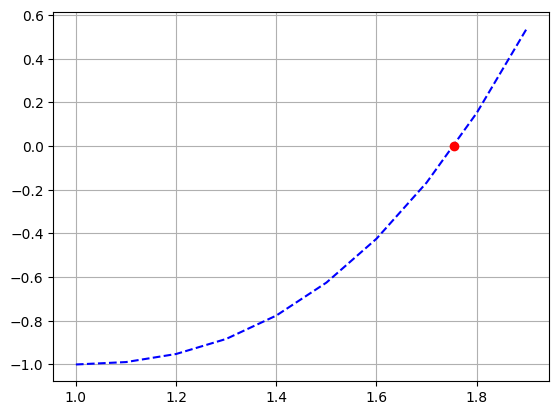

In [ ]:
'''
1) Questão 1 - a)
'''

import matplotlib.pyplot as plt
import numpy as np
import math
import time


def bisection_method(func, a, b, tol=1e-6):
    """
    Método da bissecção para encontrar raízes de uma função.

    Parâmetros:
    func: função para a qual se deseja encontrar a raiz
    a: limite inferior do intervalo
    b: limite superior do intervalo
    tol: tolerância (critério de parada)

    Retorna:
    Aproximação da raiz
    """

    fa = func(a)
    fb = func(b)

    # Verifica se a raiz está em um dos extremos
    if abs(fa) < tol:
        return a
    if abs(fb) < tol:
        return b
    
    if fa * fb > 0:
        print("O intervalo [a, b] deve conter uma raiz ou incluir o ponto onde a função é zero.")

    # Calculando o número máximo de iterações k
    k = math.ceil((math.log(b - a) - math.log(tol)) / math.log(2)) #piso
    print(f"Número máximo de iterações calculado: {k}")

    iter_count = 0
    while (b - a) / 2 > tol and iter_count < k:
        c = (a + b) / 2  # Ponto médio
        fc = func(c)

        if abs(fc) < tol:  # Encontrou a raiz exata ou suficientemente próxima
            return c
        elif fa * fc < 0:
            b, fb = c, fc  # A raiz está no intervalo [a, c]
        else:
            a, fa = c, fc  # A raiz está no intervalo [c, b]

        iter_count += 1


    print(f"Número de iterações realizadas: {iter_count}")
    return (a + b) / 2  # Aproximação da raiz

def func(x):
    return x**3 - 2*x**2 + x - 1

a = -5  # Intervalo inferior
b = 2  # Intervalo superior
esp = 0.001  # Precisão

# Chamando a função corretamente
raiz = bisection_method(func, a, b, tol=esp)
print(f"A raiz encontrada é aproximadamente: {raiz:.5}")

x = np.arange(1, 2, 0.1)
y = func(x)

plt.figure()
plt.plot(x, y, 'b--')
plt.plot(raiz, func(raiz), 'ro')
plt.grid()
print('[', a, ',', b, ']')
plt.show()

In [7]:
'''
1) Questão 1 - b)
'''

# colocar uma função time para calcular o tempo de execução
# utilizando outros tipos de derivadas

def f(x):
    return x**3 - 2*x**2 + x - 1

def df(x, h=0.001):
    """ Aproximação numérica da derivada usando a diferença finita """
    return (f(x + h) - f(x)) / h

def metodo_newton(x0, tol=1e-6, max_iter=20, valor_exato=1.7549):
    """
    Método de Newton para encontrar raízes de f(x).

    Parâmetros:
    x0: aproximação inicial
    tol: tolerância para critério de parada
    max_iter: número máximo de iterações
    valor_exato: valor conhecido da raiz para cálculo do erro absoluto

    Retorna:
    Aproximação da raiz ou None se não convergir.
    """

    print("Iteração |     x      |    f(x)    |   Erro")
    print("-------------------------------------------")

    for i in range(max_iter):
        fx = f(x0)
        dfx = df(x0)
      
        if abs(dfx) < 1e-12:
            print("\nDerivada muito próxima de zero. Método falhou.")
            return None

        x1 = x0 - fx / dfx
        erro = abs(x1 - x0)

       

        if erro < tol:
            erro_absoluto = abs(x1 - valor_exato)
            print("\nConvergência alcançada!")
            print(f"Erro absoluto em relação ao valor exato: {erro_absoluto:.6f}")
            return x1

        x0 = x1

    erro_absoluto = abs(x0 - valor_exato)
    print("\nMétodo não convergiu após", max_iter, "iterações.")
    print(f"Erro absoluto em relação ao valor exato: {erro_absoluto:.6f}")
    return None


print("=== Buscando a raiz  ===")
print('')
raiz_positiva = metodo_newton(x0=1.5)
if raiz_positiva is not None:
    print(f"\nRaiz encontrada: {raiz_positiva:.6f}")
    print(f"f({raiz_positiva:.6f}) = {raiz_positiva ** 2 + raiz_positiva - 6:.6f}")



=== Buscando a raiz  ===

Iteração |     x      |    f(x)    |   Erro
-------------------------------------------

Convergência alcançada!
Erro absoluto em relação ao valor exato: 0.000022

Raiz encontrada: 1.754878
f(1.754878) = -1.165527


In [ ]:
# Questão 2

import numpy as np
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = "browser"

def f(x):
    return 75 * np.exp(-1.75 * x) + 20 * np.exp(-0.075 * x) - 15

def df(x, h=1e-6):
    return (f(x + h) - f(x)) / h


def metodo_newton(f, df, x0, tol=1e-6, max_iter=15):
    xk = [x0]  # Lista para armazenar os pontos iterativos

    print("Iteração |     x     |    f(x)   |   Erro")
    print("-------------------------------------------")

    for i in range(max_iter):
        fx = f(x0)
        dfx = df(x0)

        if abs(dfx) < 1e-12:
            print("\nDerivada muito próxima de zero. Método falhou.")
            return None

        x1 = x0 - fx / dfx
        erro = abs(x1 - x0)
        xk.append(x1)

        print(f"{i:8} | {x0:.6f} | {fx:.6f} | {erro:.6f}")

        if erro < tol:
            print("\nConvergência alcançada!")
            plot_convergencia_interativa(f, xk)
            return x1

        x0 = x1

    print("\nMétodo não convergiu após", max_iter, "iterações.")
    plot_convergencia_interativa(f, xk)
    return None

def exibir_resultado(titulo, x0):
    print(f"=== {titulo} ===")
    raiz = metodo_newton(f, df, x0)
    if raiz is not None:
        print(f"\nRaiz encontrada: {raiz:.6f}")
        print(f"f({raiz:.6f}) = {f(raiz):.6f}")
    print("\n")

exibir_resultado("Buscando a raiz", x0=6)




def plot_convergencia_interativa(f, xk):
    """Plota a função e os pontos iterativos com interatividade usando Plotly"""
    a = min(xk) - 1
    b = max(xk) + 3
    x_vals = np.linspace(a, b, 500)
    y_vals = f(x_vals)

    # Traço da função
    trace_func = go.Scatter(
        x=x_vals, y=y_vals,
        mode='lines',
        name='f(x)',
        line=dict(color='blue')
    )

    # Traço dos pontos iterativos
    trace_pontos = go.Scatter(
        x=xk,
        y=[f(xi) for xi in xk],
        mode='markers+text',
        name='Iterações',
        text=[f"x_{i}" for i in range(len(xk))],
        textposition='top center',
        marker=dict(color='red', size=8)
    )

    # Linha horizontal y = 0
    trace_eixo = go.Scatter(
        x=[a, b],
        y=[0, 0],
        mode='lines',
        line=dict(color='black', dash='dash'),
        showlegend=False
    )

    layout = go.Layout(
        title='Convergência do Método de Newton',
        xaxis=dict(title='x'),
        yaxis=dict(title='f(x)'),
        hovermode='closest'
    )

    fig = go.Figure(data=[trace_func, trace_pontos, trace_eixo], layout=layout)
    fig.show()


=== Buscando a raiz ===
Iteração |     x     |    f(x)   |   Erro
-------------------------------------------
       0 | 6.000000 | -2.245372 | 2.338792
       1 | 3.661208 | 0.321396 | 0.236955
       2 | 3.898164 | 0.011694 | 0.009261
       3 | 3.907424 | 0.000014 | 0.000011
       4 | 3.907435 | 0.000000 | 0.000000

Convergência alcançada!

Raiz encontrada: 3.907435
f(3.907435) = 0.000000




In [ ]:
# QUESTÃO 3 a)- Método da Bisseção

import numpy as np
import math

def f(x)->float:
    return (1/(0.5*q*(x + np.sqrt(x*2 + 4*(ni**2)))*u)) - p


def calcK(a, b, epsilon)->float:
    return math.ceil(math.log2(abs(b - a) / epsilon))


def metodo_bissecao(f, a, b, epsilon, k):
    iter_count = 0
    fa = f(a)
    fb = f(b)
    if fa * fb >= 0:
        print("O intervalo inicial não contém uma raiz (f(a) e f(b) devem ter sinais opostos).")
        return None, iter_count
    while abs(b - a) > epsilon and iter_count < k:
        c = (a + b) / 2
        fc = f(c)
        if abs(fc) < epsilon:
            print("Número de iterações realizadas: ", iter_count)
            return c, iter_count
        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc
        iter_count += 1
    return (a + b) / 2, iter_count


# Definindo os parâmetros
x1 = 1e10
x2 = 1e18
epsilon = 1e-20
q = 1.7e-19
ni = 6.21e9
p = 6.5e6
u = 1.350*(1000/300)**(-2.42)


k = calcK(x1, x2, epsilon)
print('Quantidade de iterações previstas: ', k)
print('')

raiz, iter_count = metodo_bissecao(f,x1, x2, epsilon, k)
print('')
print("Valor final: ", raiz)
print('')

resultado = (1/(0.5*q*(raiz + np.sqrt(raiz*2 + 4*ni*2))*u))
print("Valor real == 6.5*10^6 | Valor calculado ", resultado)

Quantidade de iterações previstas:  127

Número de iterações realizadas:  65

Valor final:  24687782439417.555

Valor real == 6.5*10^6 | Valor calculado  6503268.187133995


In [ ]:
# QUESTÃO 3 b)- Método da Secante

import numpy as np
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = "browser"

# Constantes do problema
q = 1.7e-19
ni = 6.21e9
p = 6.5e6
u = 1.350 * (1000 / 300) ** (-2.42)


def f(x):
    return (1 / (0.5 * q * (x + np.sqrt(x**2 + 4 * (ni ** 2))) * u)) - p


def metodo_secante(x0, x1, tol=1e-6, max_iter=100):
    iteracoes = []
    xk = [x0, x1]

    print("Iteração |        x         |      f(x)       |      Erro")
    print("---------------------------------------------------------------")

    for i in range(max_iter):
        fx0 = f(x0)
        fx1 = f(x1)

        try:
            x2 = x1 - (fx1 * (x1 - x0)) / (fx1 - fx0)
        except Exception as falha:
            print(f"Método falhou devido ao erro: {falha}")
            return None, iteracoes, xk

        erro = abs(x2 - x1)
        fx2 = f(x2)
        iteracoes.append((i + 1, x2, fx2, erro))
        xk.append(x2)

        print(f"{i+1:8} | {x2:.6e} | {fx2:.6e} | {erro:.6e}")

        if erro < tol:
            print("\nConvergência alcançada!")
            return x2, iteracoes, xk

        x0, x1 = x1, x2

    print(f"\nMétodo não convergiu após {max_iter} iterações.")
    return None, iteracoes, xk


def plot_convergencia_interativa(f, xk):
    """Plota a função e os pontos iterativos com interatividade usando Plotly"""
    a = min(xk) - 0.1 * min(xk)
    b = max(xk) + 0.1 * max(xk)
    x_vals = np.linspace(a, b, 500)
    y_vals = f(x_vals)

    # Traço da função
    trace_func = go.Scatter(
        x=x_vals, y=y_vals,
        mode='lines',
        name='f(x)',
        line=dict(color='blue')
    )

    # Traço dos pontos iterativos
    trace_pontos = go.Scatter(
        x=xk,
        y=[f(xi) for xi in xk],
        mode='markers+text',
        name='Iterações',
        text=[f"x_{i}" for i in range(len(xk))],
        textposition='top center',
        marker=dict(color='red', size=8)
    )

    # Linha horizontal y = 0
    trace_eixo = go.Scatter(
        x=[a, b],
        y=[0, 0],
        mode='lines',
        line=dict(color='black', dash='dash'),
        showlegend=False
    )

    layout = go.Layout(
        title='Convergência do Método da Secante',
        xaxis=dict(title='x'),
        yaxis=dict(title='f(x)'),
        hovermode='closest'
    )

    fig = go.Figure(data=[trace_func, trace_pontos, trace_eixo], layout=layout)
    fig.show()

x1 = 1e7
x2 = 1e8

print("=== Buscando a raiz pelo método da secante ===\n")
raiz_positiva, iteracoes, xk = metodo_secante(x1, x2)

if raiz_positiva is not None:
    print(f"\nRaiz encontrada: {raiz_positiva:.6e}")
    print(f"f({raiz_positiva:.6e}) = {f(raiz_positiva):.6e}")

plot_convergencia_interativa(f, xk)


=== Buscando a raiz pelo método da secante ===

Iteração |        x         |      f(x)       |      Erro
---------------------------------------------------------------
       1 | 1.246893e+10 | 5.333090e+09 | 1.236893e+10
       2 | 2.128351e+10 | 3.489383e+09 | 8.814576e+09
       3 | 3.796589e+10 | 2.054184e+09 | 1.668238e+10
       4 | 6.184319e+10 | 1.278721e+09 | 2.387730e+10
       5 | 1.012163e+11 | 7.836468e+08 | 3.937310e+10
       6 | 1.635395e+11 | 4.836582e+08 | 6.232324e+10
       7 | 2.640205e+11 | 2.973828e+08 | 1.004810e+11
       8 | 4.244352e+11 | 1.825948e+08 | 1.604148e+11
       9 | 6.796089e+11 | 1.116105e+08 | 2.551737e+11
      10 | 1.080826e+12 | 6.777009e+07 | 4.012167e+11
      11 | 1.701041e+12 | 4.069146e+07 | 6.202149e+11
      12 | 2.633047e+12 | 2.398757e+07 | 9.320065e+11
      13 | 3.971452e+12 | 1.371313e+07 | 1.338405e+12
      14 | 5.757798e+12 | 7.442059e+06 | 1.786346e+12
      15 | 7.877708e+12 | 3.690224e+06 | 2.119910e+12
      16 | 9.962805e

In [16]:
# Questão 4


import numpy as np
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = "browser"

F_target = 1.25  # N
q = Q = 2e-5  # C
a = 0.9  # m
epsilon_0 = 8.85e-12  # C^2/(N·m^2)

def f(x):
    numerator = q * Q * x
    denominator = (x**2 + a**2)**(3/2)
    return (1 / (4 * np.pi * epsilon_0)) * (numerator / denominator) - 1.25

def df(x, h=1e-12):
    return (f(x + h) - f(x)) / h


def metodo_newton(f, df, x0, tol=1e-12, max_iter=15):
    xk = [x0]  # Lista para armazenar os pontos iterativos

    print("Iteração |     x     |    f(x)   |   Erro")
    print("-------------------------------------------")

    for i in range(max_iter):
        fx = f(x0)
        dfx = df(x0)

        if abs(dfx) < 1e-10:
            print("\nDerivada muito próxima de zero. Método falhou.")
            return None

        x1 = x0 - fx / dfx
        erro = abs(x1 - x0)
        xk.append(x1)

        print(f"{i:8} | {x0:.6f} | {fx:.6f} | {erro:.6f}")

        if erro < tol:
            print("\nConvergência alcançada!")
            plot_convergencia_interativa(f, xk)
            return x1

        x0 = x1

    print("\nMétodo não convergiu após", max_iter, "iterações.")
    plot_convergencia_interativa(f, xk)
    return None

def exibir_resultado(titulo, x0):
    print(f"=== {titulo} ===")
    raiz = metodo_newton(f, df, x0)
    if raiz is not None:
        print(f"\nRaiz encontrada: {raiz:.8f}")
        print(f"f({raiz:.6f}) = {f(raiz):.8}")
    print("\n")

exibir_resultado("Buscando a raiz", x0=1)


def plot_convergencia_interativa(f, xk):
    """Plota a função e os pontos iterativos com interatividade usando Plotly"""
    a = min(xk) - 1
    b = max(xk) + 3
    x_vals = np.linspace(a, b, 500)
    y_vals = f(x_vals)

    # Traço da função
    trace_func = go.Scatter(
        x=x_vals, y=y_vals,
        mode='lines',
        name='f(x)',
        line=dict(color='blue')
    )

    # Traço dos pontos iterativos
    trace_pontos = go.Scatter(
        x=xk,
        y=[f(xi) for xi in xk],
        mode='markers+text',
        name='Iterações',
        text=[f"x_{i}" for i in range(len(xk))],
        textposition='top center',
        marker=dict(color='red', size=8)
    )

    # Linha horizontal y = 0
    trace_eixo = go.Scatter(
        x=[a, b],
        y=[0, 0],
        mode='lines',
        line=dict(color='black', dash='dash'),
        showlegend=False
    )

    layout = go.Layout(
        title='Convergência do Método de Newton',
        xaxis=dict(title='x'),
        yaxis=dict(title='f(x)'),
        hovermode='closest'
    )

    fig = go.Figure(data=[trace_func, trace_pontos, trace_eixo], layout=layout)
    fig.show()


=== Buscando a raiz ===
Iteração |     x     |    f(x)   |   Erro
-------------------------------------------
       0 | 1.000000 | 0.227029 | 0.233756
       1 | 1.233756 | -0.004050 | 0.004188
       2 | 1.229568 | 0.000005 | 0.000005
       3 | 1.229573 | -0.000000 | 0.000000
       4 | 1.229573 | 0.000000 | 0.000000

Convergência alcançada!

Raiz encontrada: 1.22957297
f(1.229573) = 2.220446e-16




In [ ]:
# Questão 6

import numpy as np
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = "browser"

# Constantes fornecidas
v0 = 20      # m/s
x = 35       # m
y0 = 2       # m
y_final = 1  # m
g = 9.81     # m/s²

# Função da trajetória - queremos encontrar theta tal que f(theta) = 0
def f(theta):
    return x * np.tan(theta) - (g * x**2) / (2 * v0**2 * np.cos(theta)**2) + y0 - y_final

# Derivada numérica
def df(theta, h=1e-6):
    return (f(theta + h) - f(theta)) / h

# Método de Newton
def metodo_newton(f, df, x0, tol=1e-6, max_iter=15):
    xk = [x0]

    print("Iteração |     x     |    f(x)   |   Erro")
    print("-------------------------------------------")

    for i in range(max_iter):
        fx = f(x0)
        dfx = df(x0)

        if abs(dfx) < 1e-8:
            print("\nDerivada muito próxima de zero. Método falhou.")
            return None

        x1 = x0 - fx / dfx
        erro = abs(x1 - x0)
        xk.append(x1)

        print(f"{i:8} | {x0:.6f} | {fx:.6f} | {erro:.6f}")

        if erro < tol:
            print("\nConvergência alcançada!")
            plot_convergencia_interativa(f, xk)
            return x1
        x0 = x1

    print("\nMétodo não convergiu após", max_iter, "iterações.")
    plot_convergencia_interativa(f, xk)
    return None

def plot_convergencia_interativa(f, xk):
    a = min(xk) - 0.2
    b = max(xk) + 0.2
    x_vals = np.linspace(a, b, 500)
    y_vals = [f(xi) for xi in x_vals]

    trace_func = go.Scatter(x=x_vals, y=y_vals, mode='lines', name='f(θ)', line=dict(color='blue'))
    trace_pontos = go.Scatter(x=xk, y=[f(xi) for xi in xk], mode='markers+text',
                               name='Iterações', text=[f"x_{i}" for i in range(len(xk))],
                               textposition='top center', marker=dict(color='red', size=8))
    trace_eixo = go.Scatter(x=[a, b], y=[0, 0], mode='lines', line=dict(color='black', dash='dash'), showlegend=False)

    layout = go.Layout(title='Convergência do Método de Newton', xaxis=dict(title='θ (rad)'), yaxis=dict(title='f(θ)'))
    fig = go.Figure(data=[trace_func, trace_pontos, trace_eixo], layout=layout)
    fig.show()

theta_inicial = np.radians(40) 
raiz = metodo_newton(f, df, x0=theta_inicial)
print('Valor da raiz: ', raiz)
if raiz is not None:
    angulo_graus = np.degrees(raiz)
    print(f"\nÂngulo encontrado: {angulo_graus:.4f}°")
    print(f"f(θ) = {f(raiz):.6f}")


Iteração |     x     |    f(x)   |   Erro
-------------------------------------------
       0 | 0.698132 | 4.770420 | 0.285921
       1 | 0.412211 | -1.589484 | 0.061032
       2 | 0.473243 | -0.038355 | 0.001549
       3 | 0.474792 | -0.000027 | 0.000001
       4 | 0.474793 | -0.000000 | 0.000000

Convergência alcançada!
Valor da raiz:  0.474792835517415

Ângulo encontrado: 27.2036°
f(θ) = 0.000000


Número máximo de iterações calculado: 17
Número de iterações realizadas: 16
A raiz encontrada é aproximadamente: -0.0005722


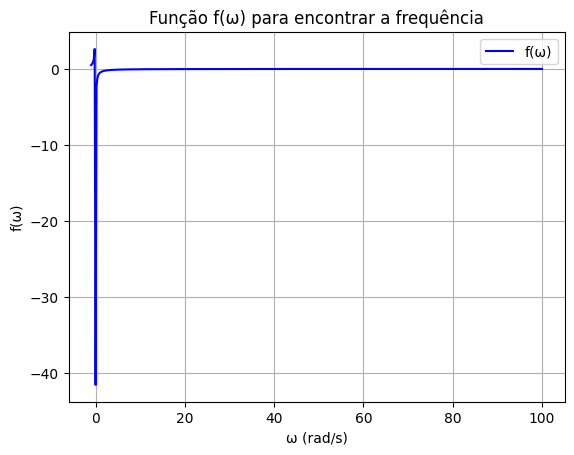

In [ ]:
# QUESTÃO 8 


import matplotlib.pyplot as plt
import numpy as np
import math


def bisection_method(func, a, b, tol):

    fa = func(a)
    fb = func(b)

    # Verifica se a raiz está em um dos extremos
    if abs(fa) < tol:
        return a
    if abs(fb) < tol:
        return b
    
    if fa * fb > 0:
        print("O intervalo [a, b] deve conter uma raiz ou incluir o ponto onde a função é zero.")

    # Calculando o número máximo de iterações k
    k = math.ceil((math.log(b - a) - math.log(tol)) / math.log(2)) #piso
    print(f"Número máximo de iterações calculado: {k}")

    iter_count = 0
    while (b - a) / 2 > tol and iter_count < k:
        c = (a + b) / 2  # Ponto médio
        fc = func(c)

        if abs(fc) < tol:  # Encontrou a raiz exata ou suficientemente próxima
            return c
        elif fa * fc < 0:
            b, fb = c, fc  # A raiz está no intervalo [a, c]
        else:
            a, fa = c, fc  # A raiz está no intervalo [c, b]

        iter_count += 1


    print(f"Número de iterações realizadas: {iter_count}")
    return (a + b) / 2  # Aproximação da raiz

def func(x):
    
    return (1/R**2) + (x*C - 1/x*L) - 1/75

a = -1  # Intervalo inferior
b = 100  # Intervalo superior
esp = 0.001  # Precisão
R = 225  # Ohms
C = 0.6e-6  # Farads
L = 0.5  # Henrys

# Chamando a função corretamente
raiz = bisection_method(func, a, b, tol=esp)
print(f"A raiz encontrada é aproximadamente: {raiz:.5}")

x = np.linspace(a, b, 500)
y = [func(xi) for xi in x]

plt.figure()
plt.plot(x, y, label="f(ω)", color="blue")
plt.grid()
plt.title("Função f(ω) para encontrar a frequência")
plt.xlabel("ω (rad/s)")
plt.ylabel("f(ω)")
plt.legend()
plt.show()

In [ ]:


def f(x):
    return x**2 - x



def bisseccao(f, a, b, tol=1e-6, max_iter=100):
    """
    Método da bissecção para encontrar a raiz de f(x) = 0 no intervalo [a, b].
    
    Parâmetros:
        f       : função para a qual queremos encontrar a raiz.
        a, b    : extremos do intervalo onde f(a) * f(b) < 0.
        tol     : tolerância para o critério de parada.
        max_iter: número máximo de iterações.
        
    Retorna:
        c       : valor aproximado da raiz.
    """
    fa = f(a)
    fb = f(b)
    
    if fa == 0:
        return a
    if fb == 0:
        return b

    if fa * fb > 0:
        raise ValueError("A função não muda de sinal no intervalo dado.")

    for _ in range(max_iter):
        c = (a + b) / 2.0
        fc = f(c)

        if abs(fc) < tol or (b - a) / 2.0 < tol:
            return c
        
        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc
            
    return (a + b) / 2.0

def encontrar_zeros(f, a, b, n_subintervalos=100, tol=1e-6):
    """
    Divide o intervalo [a, b] em n_subintervalos e aplica o método da bissecção em
    cada subintervalo onde ocorre mudança de sinal.
    
    Parâmetros:
        f               : função para a qual queremos encontrar as raízes.
        a, b            : extremos do intervalo.
        n_subintervalos : número de subintervalos para dividir [a, b].
        tol             : tolerância para o método da bissecção.
        
    Retorna:
        raizes          : lista com as raízes encontradas.
    """
    raizes = []
    x_vals = [a + i*(b - a)/n_subintervalos for i in range(n_subintervalos + 1)]

    for i in range(n_subintervalos):
        x1 = x_vals[i]
        x2 = x_vals[i+1]
        f1 = f(x1)
        f2 = f(x2)
        
        # Se um dos extremos for praticamente zero:
        if abs(f1) < tol:
            raizes.append(x1)
        elif abs(f2) < tol:
            raizes.append(x2)
        # Se ocorrer mudança de sinal, aplicar a bissecção:
        elif f1 * f2 < 0:
            raiz = bisseccao(f, x1, x2, tol=tol)
            raizes.append(raiz)
    
    # Remover raízes repetidas ou muito próximas
    raizes_unicas = []
    for r in raizes:
        if not any(abs(r - ru) < tol for ru in raizes_unicas):
            raizes_unicas.append(r)
    
    return raizes_unicas

    
a = -5   # Extremidade inferior do intervalo
b = 5    # Extremidade superior do intervalo
n_subintervalos = 50  # Número de subintervalos

raizes = encontrar_zeros(f, a, b, n_subintervalos=n_subintervalos, tol=1e-6)
print("Raízes encontradas:", raizes)


Raízes encontradas: [0.0, 1.0]


In [ ]:
def bisection(f, a, b, tol):
    if f(a) * f(b) >= 0:
        return None
    for _ in range(100):  # Limite de iterações para evitar loop infinito
        c = (a + b) / 2
        fc = f(c)
        if abs(fc) < tol:
            return c
        if f(a) * fc < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

def find_roots(f, a, b, n, tol=1e-6, min_dist=1e-6):
    roots = []
    dx = (b - a) / n
    for i in range(n):
        x_start = a + i * dx
        x_end = x_start + dx
        # Verifica se x_start é raiz
        if abs(f(x_start)) < tol:
            roots.append(x_start)
        # Verifica mudança de sinal no subintervalo
        f_start = f(x_start)
        f_end = f(x_end)
        if f_start * f_end < 0:
            root = bisection(f, x_start, x_end, tol)
            if root is not None:
                roots.append(root)
    # Verifica o ponto final b
    if abs(f(b)) < tol:
        roots.append(b)
    # Remove duplicatas e agrupa raízes próximas
    if not roots:
        return []
    roots.sort()
    grouped = []
    current = [roots[0]]
    for root in roots[1:]:
        if abs(root - current[-1]) < min_dist:
            current.append(root)
        else:
            grouped.append(current)
            current = [root]
    grouped.append(current)
    # Retorna a média de cada grupo
    return [sum(g) / len(g) for g in grouped]

# Exemplo de uso:
f = lambda x: x**2 - 4  # Função f(x) = x² - 4
raizes = find_roots(f, -3, 3, 6)
print("Raízes encontradas:", raizes)  # Deve retornar [-2.0, 2.0]

Raízes encontradas: [-2.0, 2.0]
